# Data visualization

### IMPORTANT!
If you are not already in "nbviewer", click [here](https://nbviewer.jupyter.org/github/christian-5-28/ADA-Sciuto-Smith-Tarantino/blob/master/03%20-%20Interactive%20Viz/interactive_viz.ipynb) to see every map rendered! 

Assignment 1.

Go to the eurostat website and try to find a dataset that includes the european unemployment rates at a recent date.

Use this data to build a Choropleth map which shows the unemployment rate in Europe at a country level. Think about the colors you use, how you decided to split the intervals into data classes or which interactions you could add in order to make the visualization intuitive and expressive. Compare Switzerland's unemployment rate to that of the rest of Europe.

In [1]:
import pandas as pd
import numpy as np
import json
import sys
import os
import folium
import matplotlib.pyplot as plt
print (folium.__version__)

0.5.0


# TASK 1
## Acquiring Data


Let's check out the unemployment data downloaded from eurostat.

Code below shows every 28:th row, just to get a quick overview.

In [2]:
df_eu = pd.read_csv("data/UnemploymentEU.csv")
df_eu.iloc[::28]

,TIME,GEO,AGE,UNIT,SEX,Value,Flag and Footnotes
0,2007,European Union (28 countries),Total,Percentage of active population,Total,7.2,NaN
28,2015,European Union (25 countries),Total,Percentage of active population,Total,9.5,NaN
56,2013,Euro area (18 countries),Total,Percentage of active population,Total,12.0,NaN
84,2011,Czech Republic,Total,Percentage of active population,Total,6.7,NaN
112,2009,Estonia,Total,Percentage of active population,Total,13.5,NaN
140,2007,Spain,Total,Percentage of active population,Total,8.2,NaN
168,2015,Croatia,Total,Percentage of active population,Total,16.1,NaN
196,2013,Latvia,Total,Percentage of active population,Total,11.9,NaN
224,2011,Hungary,Total,Percentage of active population,Total,11.0,NaN
252,2009,Austria,Total,Percentage of active population,Total,5.3,NaN


Note three things:
 * It contains data for the years 2008 through 2016. We are only interested in the latest data, i.e. year 2016.
 
 * It contains a lot of (for our purpose) unnecessary columns.
 
 * Unemployment is a percentage of *active* population. The same statistic is used for Switzerland later on.  
   To be able to compare the data from EU with CH, it's important that we use unemployment rates calculated in the same manner.

----

Now extract the unemployment rate for each country in the year of 2016.

In [3]:
# Only capture data from 2016
df_eu = df_eu.loc[df_eu["TIME"] == 2016, ["GEO", "Value"]].reset_index().drop("index", 1)

# Drop aggregate for EU, US, Japan.
df_eu = df_eu.drop([0, 1, 2, 3, 4, 5, 6, 37, 38])

# Rename Germany (... former territory ...) to just 'Germany' to match with the TopoJson data later.
df_eu.loc[10, "GEO"] = "Germany"

# Sort descending and reset the index
df_eu = df_eu.sort_values("Value", ascending=False).reset_index().drop("index", 1)
df_eu

,GEO,Value
0,Greece,23.6
1,Spain,19.6
2,Croatia,13.4
3,Cyprus,13.0
4,Italy,11.7
5,Portugal,11.2
6,Turkey,10.9
7,France,10.1
8,Slovakia,9.7
9,Latvia,9.6


## Choropleth Map for unemployment rate in the EU

Alright! We have our data and are now ready to plot. Note that we also save the map as a HTML file.

In [4]:
eu_topojson = json.load(open("topojson/europe.topojson.json")) # Load TopoJson data

eu_m = folium.Map(location=[52.5, 15], tiles='cartodbpositron', zoom_start=4) # Map centered on Europe

# Create a choropleth map from the data
# Note that since we use TopoJson and not GeoJson we need the 'topojson' argument
eu_m.choropleth(geo_data=eu_topojson, topojson="objects.europe",
             data=df_eu, columns=["GEO", "Value"], key_on="feature.properties.NAME",
             fill_color='YlOrRd', fill_opacity=0.5, line_opacity=0.2,
             legend_name='Unemployment Rates',
             threshold_scale=[3, 6, 9, 12, 15, 18])
# Save map
eu_m.save('EU_Unemployment_2016.html')
eu_m

Seems like Greece and Spain still haven't recovered from the crisis. Both have unemployment rates at (roughly) or above 20%.  
Thankfully, in Portugal things are going better. Looking at historic data we see that the unemployment rate have decreased from 16% year 2013 to the current (year 2016) 11.2%. Not ideal, but certainly an improvement.

In **Switzerland**, the unemployment rate year 2016 was 4.9% ([OECD](https://data.oecd.org/unemp/unemployment-rate.htm)). Compared to the rest of Europe, this is very good.  
The few countries with lower unemployment rates then 4.9% are listed below.

In [5]:
lower_than_ch = df_eu.loc[df_eu["Value"] <= 4.9]
print("Length:", len(lower_than_ch))
lower_than_ch

Length: 6


,GEO,Value
24,United Kingdom,4.8
25,Malta,4.7
26,Norway,4.7
27,Germany,4.1
28,Czech Republic,4.0
29,Iceland,3.0


### Acquiring the data for Switzerland

The data downloaded from amstat was too verbose for our purposes, see image below.
![Before cleanup](data/b4.png)

So first we cleaned it up with a find-and-replace utilising a Regular Expression (see above image for expression used).

We also added the two-letter identifier for each canton.

Result:
![After cleanup](data/after.png)

In [6]:
pd.read_csv("data/UnemploymentSwitzerlandClean.csv", index_col='Id')

,Kanton,Unemployment Rate
Id,,
AG,Aargau,2.9
AR,Appenzell Ausserrhoden,1.7
AI,Appenzell Innerrhoden,0.7
BL,Basel-Landschaft,2.8
BS,Basel-Stadt,3.5
BE,Bern,2.4
FR,Freiburg,2.7
GE,Genf,5.2
GL,Glarus,1.8


## TASK 2

Assignment 2.

Go to the amstat website to find a dataset that includes the unemployment rates in Switzerland at a recent date.

HINT: Go to the details tab to find the raw data you need. If you do not speak French, German or Italian, think of using free translation services to navigate your way through.
Use this data to build another Choropleth map, this time showing the unemployment rate at the level of swiss cantons. Again, try to make the map as expressive as possible, and comment on the trends you observe.

The Swiss Confederation defines the rates you have just plotted as the number of people looking for a job divided by the size of the active population (scaled by 100). This is surely a valid choice, but as we discussed one could argue for a different categorization.

Copy the map you have just created, but this time don't count in your statistics people who already have a job and are looking for a new one. How do your observations change ? You can repeat this with different choices of categories to see how selecting different metrics can lead to different interpretations of the same data.

### FIRST PART - LAST MONTH STUDY

Loading the data about unemployed people from xlsx file. Skipping the first two rows because useless.

In [7]:
data_path_xlsx = 'data/unemployment_final.xlsx'
unemployment = pd.read_excel(data_path_xlsx, header=[2])
unemployment.head()

,Cantone,mese,Settembre 2017,Settembre 2017.1,Settembre 2017.2,Settembre 2017.3,Settembre 2017.4
0,NaN,Metriche,Disoccupati registrati,Disoccupati dei giovani,Disoccupati di lunga durata,Persone in cerca d'impiego,Persone in cerca d'impiego non disoccupate
1,Zurigo,NaN,27225,3420,4753,34156,6931
2,Berna,NaN,13658,2003,2336,18385,4727
3,Lucerna,NaN,3885,664,453,6756,2871
4,Uri,NaN,112,15,13,257,145


Here we load the data that contains the rates of unemployment. These rates refer only to people that do not have a job.

In [8]:
data_rate_path = 'data/unemployment_rate.xlsx'
rates = pd.read_excel(data_rate_path, header=[2])
rates.head()

,Cantone,mese,Settembre 2017,Settembre 2017.1,Settembre 2017.2,Totale,Totale.1,Totale.2
0,NaN,Metriche,Tasso di disoccupazione,Coefficiente di variazione,Disoccupati registrati,Tasso di disoccupazione,Coefficiente di variazione,Disoccupati registrati
1,Zurigo,NaN,3.3,A,27225,3.3,A,27225
2,Berna,NaN,2.4,A,13658,2.4,A,13658
3,Lucerna,NaN,1.7,A,3885,1.7,A,3885
4,Uri,NaN,0.6,C,112,0.6,C,112


Here we drop useless columns for the task from the rate dataframe, such as blank columns, number identifiers and all the other columns except for the most recent month (September 2017) that refers to people that unemployed. Then we drop the first blank row (with the call to dropna()) and the last row (Total) and convert the rates to float.

In [9]:
rates = rates[["Cantone", "Settembre 2017"]]
rates.dropna(inplace=True)
rates.drop(27, axis=0, inplace=True)
rates["Settembre 2017"] = rates["Settembre 2017"].apply(pd.to_numeric)
rates.columns = ["Cantone", "Rate"]
rates.head()

,Cantone,Rate
1,Zurigo,3.3
2,Berna,2.4
3,Lucerna,1.7
4,Uri,0.6
5,Svitto,1.7


We repeat the same procedure for the unemployment dataframe, where we leave only the data that refer to unemployed people and people that are searching for a job

In [10]:
unemployment = unemployment[["Cantone", "Settembre 2017", "Settembre 2017.3"]]
unemployment.dropna(inplace=True)
unemployment.drop(27, axis=0, inplace=True)
unemployment["Settembre 2017"] = unemployment["Settembre 2017"].apply(pd.to_numeric)
unemployment.columns = ["Cantone", "Unemployed", "People searching for a job"]
unemployment.head()

,Cantone,Unemployed,People searching for a job
1,Zurigo,27225,34156
2,Berna,13658,18385
3,Lucerna,3885,6756
4,Uri,112,257
5,Svitto,1455,2229


Now we put together both dataframe using "Cantone" as the key of the merge

In [11]:
unemployment = unemployment.merge(rates, on="Cantone")
unemployment.head()

,Cantone,Unemployed,People searching for a job,Rate
0,Zurigo,27225,34156,3.3
1,Berna,13658,18385,2.4
2,Lucerna,3885,6756,1.7
3,Uri,112,257,0.6
4,Svitto,1455,2229,1.7


Rate refer to the unemployed column. So, in order to be clearer, we are going to modifiy the name of the column rate and we are going to add the rate for people that are searching for a job, too.

In [12]:
unemployment.rename(columns={"Rate": "UN-Rate"}, inplace=True)
unemployment["PSJ-Rate"] = unemployment['UN-Rate'] / unemployment['Unemployed'] * unemployment['People searching for a job']
unemployment.head()

,Cantone,Unemployed,People searching for a job,UN-Rate,PSJ-Rate
0,Zurigo,27225,34156,3.3,4.14012
1,Berna,13658,18385,2.4,3.23063
2,Lucerna,3885,6756,1.7,2.95629
3,Uri,112,257,0.6,1.37679
4,Svitto,1455,2229,1.7,2.60433


Now we need to change every name in column "Cantone" with the same ID that is presented in the topojson file in order to have same key when we use key_on in the choropleth method.

In [13]:
cantons = {'Zurigo': 'ZH',
           'Berna': 'BE',
           'Lucerna': 'LU',
           'Uri': 'UR',
           'Svitto': 'SZ',
           'Obwaldo': 'OW',
           'Nidwaldo': 'NW',
           'Glarona': 'GL',
           'Zugo': 'ZG',
           'Friburgo': 'FR',
           'Soletta': 'SO',
           'Basilea-Città': 'BS',
           'Basilea-Campagna': 'BL',
           'Sciaffusa': 'SH',
           'Appenzello Esterno': 'AR',
           'Appenzello Interno': 'AI',
           'San Gallo': 'SG',
           'Grigioni': 'GR',
           'Argovia': 'AG',
           'Turgovia': 'TG',
           'Ticino': 'TI',
           'Vaud': 'VD',
           'Vallese': 'VS',
           'Neuchâtel': 'NE',
           'Ginevra': 'GE',
           'Giura': 'JU'
           }

unemployment.replace({'Cantone': cantons}, inplace=True)
unemployment.head()

,Cantone,Unemployed,People searching for a job,UN-Rate,PSJ-Rate
0,ZH,27225,34156,3.3,4.14012
1,BE,13658,18385,2.4,3.23063
2,LU,3885,6756,1.7,2.95629
3,UR,112,257,0.6,1.37679
4,SZ,1455,2229,1.7,2.60433


### SECOND PART - YEAR STUDY

Until now we have used data only from the last month, but to be more precise, we are going to use the same procedure on the same data from all the year until the last month registered, using the mean between the months

Here we work with data of strictly unemployed people.

In [14]:
data_path_xlsx = 'data/unemployment_year.xlsx'
unemployment_year = pd.read_excel(data_path_xlsx, header=[2])
unemployment_year.head()

,Cantone,mese,Gennaio 2017,Febbraio 2017,Marzo 2017,Aprile 2017,Maggio 2017,Giugno 2017,Luglio 2017,Agosto 2017,Settembre 2017
0,NaN,Metriche,Disoccupati registrati,Disoccupati registrati,Disoccupati registrati,Disoccupati registrati,Disoccupati registrati,Disoccupati registrati,Disoccupati registrati,Disoccupati registrati,Disoccupati registrati
1,Zurigo,NaN,32387,31619,30841,29542,28624,27925,27992,27514,27225
2,Berna,NaN,16954,16738,16035,15322,14397,13590,13633,13829,13658
3,Lucerna,NaN,4985,4808,4493,4315,4082,3884,3875,3992,3885
4,Uri,NaN,297,276,256,228,196,159,129,123,112


In [15]:
# Deleting first and last row (Total)
unemployment_year = unemployment_year.iloc[1:unemployment_year.shape[0]-1]
unemployment_year.head()
unemployment_year.dropna(axis=1, inplace=True)
unemployment_year = unemployment_year.set_index("Cantone")
unemployment_year = unemployment_year.mean(axis=1)
unemployment_year.tail()

Cantone
Vaud         18240.444444
Vallese       6208.666667
Neuchâtel     5283.222222
Ginevra      12437.777778
Giura         1719.222222
dtype: float64

Here we work with the rates that refer to the previous data.

In [16]:
data_rate_path = 'data/unemployment_year_rate.xlsx'
rates_year = pd.read_excel(data_rate_path, header=[2])
rates_year.head()

,Cantone,mese,Gennaio 2017,Febbraio 2017,Marzo 2017,Aprile 2017,Maggio 2017,Giugno 2017,Luglio 2017,Agosto 2017,Settembre 2017,Ottobre 2017,Totale
0,NaN,Metriche,Tasso di disoccupazione,Tasso di disoccupazione,Tasso di disoccupazione,Tasso di disoccupazione,Tasso di disoccupazione,Tasso di disoccupazione,Tasso di disoccupazione,Tasso di disoccupazione,Tasso di disoccupazione,Tasso di disoccupazione,Tasso di disoccupazione
1,Zurigo,NaN,3.9,3.9,3.8,3.6,3.5,3.4,3.4,3.4,3.3,0,3.2
2,Berna,NaN,3,3,2.9,2.7,2.6,2.4,2.4,2.5,2.4,0,2.4
3,Lucerna,NaN,2.2,2.2,2,1.9,1.8,1.7,1.7,1.8,1.7,0,1.7
4,Uri,NaN,1.5,1.4,1.3,1.2,1,0.8,0.7,0.6,0.6,0,0.9


In [17]:
# Deleting first and last row (Total)
rates_year = rates_year.iloc[1:rates_year.shape[0]-1]
rates_year.drop(["Ottobre 2017", "Totale"], axis=1, inplace=True)
rates_year.dropna(axis=1, inplace=True)
rates_year = rates_year.set_index("Cantone")
rates_year = rates_year.apply(pd.to_numeric)
rates_year = rates_year.mean(axis=1)
rates_year.head()

Cantone
Zurigo     3.577778
Berna      2.655556
Lucerna    1.888889
Uri        1.011111
Svitto     1.788889
dtype: float64

Here we work with the sum of unemployed people and people that are searching for a job but that currently have a job

In [18]:
data_job_path = 'data/unemployment_year_job.xlsx'
jobs_year = pd.read_excel(data_job_path, header=[2])
jobs_year.head()

,Cantone,mese,Gennaio 2017,Febbraio 2017,Marzo 2017,Aprile 2017,Maggio 2017,Giugno 2017,Luglio 2017,Agosto 2017,Settembre 2017
0,NaN,Metriche,Persone in cerca d'impiego,Persone in cerca d'impiego,Persone in cerca d'impiego,Persone in cerca d'impiego,Persone in cerca d'impiego,Persone in cerca d'impiego,Persone in cerca d'impiego,Persone in cerca d'impiego,Persone in cerca d'impiego
1,Zurigo,NaN,39340,38748,38051,36610,35784,35134,35112,34542,34156
2,Berna,NaN,21586,21367,20889,19882,19019,18230,18442,18393,18385
3,Lucerna,NaN,7950,7857,7574,7303,7091,6914,6805,6853,6756
4,Uri,NaN,464,457,431,394,359,294,265,267,257


In [19]:
# Deleting first and last row (Total)
jobs_year = jobs_year.iloc[1:jobs_year.shape[0]-1]
jobs_year.dropna(axis=1, inplace=True)
jobs_year = jobs_year.set_index("Cantone")
jobs_year = jobs_year.apply(pd.to_numeric)
jobs_year = jobs_year.mean(axis=1)
jobs_year.head()

Cantone
Zurigo     36386.333333
Berna      19577.000000
Lucerna     7233.666667
Uri          354.222222
Svitto      2358.777778
dtype: float64

Now it's the moment to put the three Series that refer to the mean of the data of the year together.

In [20]:
year = pd.concat([unemployment_year, rates_year], axis=1)
year = pd.concat([year, jobs_year], axis=1)
year = year.reset_index()
year.columns = ["Cantone", "Unemployed", "UN-Rate", "People Searching For A Job"]
year.head()

,Cantone,Unemployed,UN-Rate,People Searching For A Job
0,Zurigo,29296.555556,3.577778,36386.333333
1,Berna,14906.222222,2.655556,19577.000000
2,Lucerna,4257.666667,1.888889,7233.666667
3,Uri,197.333333,1.011111,354.222222
4,Svitto,1561.222222,1.788889,2358.777778


Before we can continue, we have to add the rates that refer to "People Searching For A Job", as we did when we were considering only one month (PSJ - Rate). Lastly, we change the name of the cantons with their IDs.

In [21]:
year["PSJ-Rate"] = year['UN-Rate'] / year['Unemployed'] * year['People Searching For A Job']

year.replace({'Cantone': cantons}, inplace=True)
year.head()

,Cantone,Unemployed,UN-Rate,People Searching For A Job,PSJ-Rate
0,ZH,29296.555556,3.577778,36386.333333,4.443601
1,BE,14906.222222,2.655556,19577.000000,3.487658
2,LU,4257.666667,1.888889,7233.666667,3.209174
3,UR,197.333333,1.011111,354.222222,1.814990
4,SZ,1561.222222,1.788889,2358.777778,2.702749


### THIRD PART - MAPS

Before continuing, we need the locations(latitude and longitude) of every canton that will be saved in the locations list.

In [22]:
from geopy import Nominatim

locations = {}
for canton in year.Cantone:
    geolocator = Nominatim()
    location = geolocator.geocode(canton + " Schweiz/Suisse/Svizzera/Svizra")
    locations[canton] = location

#### Now we color the swiss map showing the rates of PEOPLE LOOKING FOR A JOB.


* The first map refers to data of September 2017
* The second map refers to the mean of the data from January to September 2017

In [23]:
json_path = 'topojson/ch-cantons.topojson.json'
geo_data = json.load(open(json_path))
swiss_coord = [46.948927005132, 7.4074140555507]
m_swiss_sept = folium.Map(location=swiss_coord, zoom_start=7)
m_swiss_sept.choropleth(geo_data=geo_data, 
                        topojson='objects.cantons', 
                        data=unemployment,
                        columns=['Cantone', 'PSJ-Rate'],
                        key_on='feature.id',
                        fill_color='OrRd',
                        fill_opacity=0.7,
                        line_opacity=0.2,
                        legend_name='People searching for a job in September (%)')

for index, canton in enumerate(unemployment.Cantone):
    _html = '''
    <h3>Canton ''' + canton + '''</h3>
    <p>People searching for a job rate (September): ''' + str(round(unemployment["PSJ-Rate"].loc[index], 2)) + ''' % </p>
    '''
    folium.CircleMarker(location=[locations[canton].latitude, locations[canton].longitude],\
                        popup=_html, radius=10, color='#3186cc', fill=True, fill_color='#3186cc').add_to(m_swiss_sept)

In [24]:
m_swiss_year = folium.Map(location=swiss_coord, zoom_start=7)
m_swiss_year.choropleth(geo_data=geo_data, topojson='objects.cantons', data=year,
             columns=['Cantone', 'PSJ-Rate'],
             key_on='feature.id',
             fill_color='OrRd', fill_opacity=0.7, line_opacity=0.2,
             legend_name='People searching for a job during the year (%)')

for index, canton in enumerate(year.Cantone):
    _html = '''
    <h3>Canton ''' + canton + '''</h3>
    <p>People searching for a job rate (mean of the year): ''' + str(round(year["PSJ-Rate"].loc[index], 2)) + ''' % </p>
    '''
    folium.CircleMarker(location=[locations[canton].latitude, locations[canton].longitude],\
                        popup=_html, radius=10, color='#3186cc', fill=True, fill_color='#3186cc').add_to(m_swiss_year)

In [25]:
import branca
f = branca.element.Figure()
d1 = f.add_subplot(1, 2, 1)
d2 = f.add_subplot(1, 2, 2)
d1.add_child(m_swiss_sept)
d2.add_child(m_swiss_year)

* First Map - September 2017: We can clearly see two trends that go in parallel. People in German speaker cantons aren't searching for jobs as much as other cantons. Additionally, we can see that the rates increase while we move from east to west.

* Second Map - January -> September 2017: the two trends described above are present as well, but we can observe that if we take data from all the year, rates are generally lower everywhere, except for the canton of Valais: during the year more people were searching for a job in average than in September.

#### Now we color the swiss map showing the rates of UNEMPLOYED PEOPLE.



* The first map refers to data of September 2017
* The second map refers to the mean of the data from January to September 2017

In [56]:
m_swiss_sept = folium.Map(location=swiss_coord, zoom_start=7)
m_swiss_sept.choropleth(geo_data=geo_data, topojson='objects.cantons', data=unemployment,
             columns=['Cantone', 'UN-Rate'],
             key_on='feature.id',
             fill_color='OrRd', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Unemployed people (%)')

for index, canton in enumerate(unemployment.Cantone):
    _html = '''
    <h3>Canton ''' + canton + '''</h3>
    <p>Unemployed people rate (September): ''' + str(round(unemployment["PSJ-Rate"].loc[index], 2)) + ''' % </p>
    '''
    folium.CircleMarker(location=[locations[canton].latitude, locations[canton].longitude],\
                        popup=_html, radius=10, color='#3186cc', fill=True, fill_color='#3186cc').add_to(m_swiss_sept)

In [57]:
m_swiss_year = folium.Map(location=swiss_coord, zoom_start=7)
m_swiss_year.choropleth(geo_data=geo_data, topojson='objects.cantons', data=year,
             columns=['Cantone', 'UN-Rate'],
             key_on='feature.id',
             fill_color='OrRd', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Unemployed people (%)')

for index, canton in enumerate(year.Cantone):
    _html = '''
    <h3>Canton ''' + canton + '''</h3>
    <p>Unemployed people rate (mean of the year): ''' + str(round(year["PSJ-Rate"].loc[index], 2)) + ''' % </p>
    '''
    folium.CircleMarker(location=[locations[canton].latitude, locations[canton].longitude],\
                        popup=_html, radius=10, color='#3186cc', fill=True, fill_color='#3186cc').add_to(m_swiss_year)

In [58]:
f = branca.element.Figure()
d1 = f.add_subplot(1, 2, 1)
d2 = f.add_subplot(1, 2, 2)
d1.add_child(m_swiss_sept)
d2.add_child(m_swiss_year)

* Third and Fourth map: we can make the same considerations about the differences of these two last maps that we have already done for the first and second.
* Differences between PSJ and Unemployed maps: when we speak of unemployed people (and not people searching for a job), the balance between the cantons changes. German cantons and French Cantons have a more similar unemployed rate. Ticino canton as well. The only trend in common between the two ways of showing these data (one using all the people that are searching for a job and the other one using strictly unemployed people) is that in the eastern Swiss rates seem to be very lower that the western ones. Between south and north there is not much difference. In every map Neuchatel canton is the darkest one, so we can be sure when we say that Neuchatel is the canton where unemployment is greater than any other canton.

# Task 3

- **Question 1**: Use the amstat website again to find a dataset that includes the unemployment rates in Switzerland at recent date, this time making a distinction between Swiss and foreign workers. The Economic Secretary (SECO) releases a monthly report on the state of the employment market. In the latest report (September 2017), it is noted that there is a discrepancy between the unemployment rates for foreign (5.1%) and Swiss (2.2%) workers.
- **Question 2**: Show the difference in unemployment rates between the two categories in each canton on a Choropleth map (hint The easy way is to show two separate maps, but can you think of something better ?). Where are the differences most visible ? Why do you think that is ?
- **Question 3**: Now let's refine the analysis by adding the differences between age groups. As you may have guessed it is nearly impossible to plot so many variables on a map. Make a bar plot, which is a better suited visualization tool for this type of multivariate data.

In order to answer question 1 and question 2 we decided to focus only on the datas from **september 2017**, in order to verify the claim of SECO.

### Answer 1: study on september 2017

- First, we downloaded the xlsx file from the Amstat site, we took the dataset from the folder 2.1 where you can find the unemployment rate already evaluated for swiss and foreigns people of each canton

In [29]:
data_path_xlsx = 'data/2_1 Tasso di disoccupazione.xlsx'
df_raw_unemployment_foreigns_swiss_2017 = pd.read_excel(data_path_xlsx)
df_raw_unemployment_foreigns_swiss_2017.head()

,Cantone,Nazionalità,mese,Settembre 2017,Unnamed: 4,Totale,Unnamed: 6
0,NaN,NaN,Metriche,Tasso di disoccupazione,Disoccupati registrati,Tasso di disoccupazione,Disoccupati registrati
1,Zurigo,stranieri,NaN,5.3,12111,5.3,12111
2,Zurigo,svizzeri,NaN,2.5,15114,2.5,15114
3,Berna,stranieri,NaN,5.5,4900,5.5,4900
4,Berna,svizzeri,NaN,1.8,8758,1.8,8758


- We drop the first useless row:

In [30]:
df_raw_unemployment_foreigns_swiss_2017.drop(0, inplace= True)


- As done before, we replace the names of the cantons with their respective canton ID and we convert to numeric the values of the column 'Settembre 2017':

In [31]:
df_raw_unemployment_foreigns_swiss_2017.replace({'Cantone': cantons}, inplace=True)
df_raw_unemployment_foreigns_swiss_2017["Settembre 2017"] = df_raw_unemployment_foreigns_swiss_2017["Settembre 2017"].apply(pd.to_numeric)
df_raw_unemployment_foreigns_swiss_2017.head()

,Cantone,Nazionalità,mese,Settembre 2017,Unnamed: 4,Totale,Unnamed: 6
1,ZH,stranieri,NaN,5.3,12111,5.3,12111
2,ZH,svizzeri,NaN,2.5,15114,2.5,15114
3,BE,stranieri,NaN,5.5,4900,5.5,4900
4,BE,svizzeri,NaN,1.8,8758,1.8,8758
5,LU,stranieri,NaN,3.9,1593,3.9,1593


- Now, we set as index the 'Cantone' column, this is done in order to create a new dataframe with the same index and then add to it specific values of our raw dataframe with selection operations.

In [32]:
df_raw_unemployment_foreigns_swiss_2017.set_index('Cantone', inplace= True)


- We create a new dataframe with three new columns: 'foreigns_September_rate', 'swiss_september_rate' and 'difference_foreign_swiss_rate_september'. We're going to do it selecting the specific values using the loc method and a boolean mask for selecting the 'foreigns' values ('stranieri') and swiss values ('svizzeri') in the 'Settembre_2017' column.

In [33]:
#getting the foreigns rate
unemployed_foreign_swiss_sept_2017_final = df_raw_unemployment_foreigns_swiss_2017. \
                                loc[df_raw_unemployment_foreigns_swiss_2017['Nazionalità'] == 'stranieri', ['Settembre 2017']]
    
unemployed_foreign_swiss_sept_2017_final = pd.DataFrame. \
                        rename(unemployed_foreign_swiss_sept_2017_final, columns= {'Settembre 2017' : 'foreigns_September_rate'})

#creating the column with the swiss rate 
unemployed_foreign_swiss_sept_2017_final['swiss_September_rate'] = df_raw_unemployment_foreigns_swiss_2017. \
                                    loc[df_raw_unemployment_foreigns_swiss_2017['Nazionalità'] == 'svizzeri', 'Settembre 2017']

# creating the column with the difference of the two rates (foreigns rate - swiss rate)
unemployed_foreign_swiss_sept_2017_final['difference_foreign_swiss_rate_september'] =  \
                                unemployed_foreign_swiss_sept_2017_final['foreigns_September_rate'] \
                                - unemployed_foreign_swiss_sept_2017_final['swiss_September_rate']
        
unemployed_foreign_swiss_sept_2017_final.reset_index(inplace= True)
unemployed_foreign_swiss_sept_2017_final.head()

,Cantone,foreigns_September_rate,swiss_September_rate,difference_foreign_swiss_rate_september
0,ZH,5.3,2.5,2.8
1,BE,5.5,1.8,3.7
2,LU,3.9,1.3,2.6
3,UR,2.1,0.4,1.7
4,SZ,3.4,1.2,2.2


### Reproducing SEPO claim

In order to reproduce this claim we cannot do the raw mean of the rates that we have in our dataframe, because each rate is evaluated on the total active population of each canton. Therefore, first we have to find the active population of each canton ( foreigns and swiss respectively), then we can find the two total rates dividing the sum of all unemployed by the sum of all active populations. Let us give you some formulas for clarity:

$Rate\_unemployed\_foreign\_canton = \frac{number\_unemployed\_foreign\_canton}{number\_foreign\_active\_popul\_canton} \implies number\_foreign\_active\_popul\_canton=\frac{number\_unemployed\_foreign\_canton}{Rate\_unemployed\_foreign\_canton}$



Therefore, the rate of total unemployed foreigns in switzerland is:

$Rate\_unemployed\_foreign\_switzerland = \frac{\sum{ number\_unemployed\_foreign\_canton}}{\sum{number\_foreign\_active\_popul\_canton}}$


Same formulas for the swiss active population and the rate of unemployed swiss in Switzerland.

- Now we will get all the data that we need, first the number of unemployed people (foreigns, swiss) for each canton:

In [34]:
unemployed_foreign_swiss_sept_2017_final.set_index('Cantone', inplace= True)

#creating a column with the number of unemployed foreign people for each canton
unemployed_foreign_swiss_sept_2017_final['number_unemp_foreign_september'] = df_raw_unemployment_foreigns_swiss_2017.loc[
                                        df_raw_unemployment_foreigns_swiss_2017['Nazionalità'] == 'stranieri', ['Unnamed: 4']]

#creating a column with the number of unemployed swiss people for each canton
unemployed_foreign_swiss_sept_2017_final['number_unemp_swiss_september'] = df_raw_unemployment_foreigns_swiss_2017.loc[
                                            df_raw_unemployment_foreigns_swiss_2017['Nazionalità'] == 'svizzeri', ['Unnamed: 4']]

unemployed_foreign_swiss_sept_2017_final.head()

,foreigns_September_rate,swiss_September_rate,difference_foreign_swiss_rate_september,number_unemp_foreign_september,number_unemp_swiss_september
Cantone,,,,,
ZH,5.3,2.5,2.8,12111,15114
BE,5.5,1.8,3.7,4900,8758
LU,3.9,1.3,2.6,1593,2292
UR,2.1,0.4,1.7,53,59
SZ,3.4,1.2,2.2,617,838


- then, we add two columns with the active population for foreigns and swiss people (we evaluate them with the formulas already described)

In [35]:
# creating the column with the number of active population of foreign people
unemployed_foreign_swiss_sept_2017_final['active_population_foreign_september'] = unemployed_foreign_swiss_sept_2017_final[
                    'number_unemp_foreign_september'] / (unemployed_foreign_swiss_sept_2017_final['foreigns_September_rate']/100)

# creating the column with the number of active population of swiss people
unemployed_foreign_swiss_sept_2017_final['active_population_swiss_september'] = unemployed_foreign_swiss_sept_2017_final[
                        'number_unemp_swiss_september'] / (unemployed_foreign_swiss_sept_2017_final['swiss_September_rate']/100)

unemployed_foreign_swiss_sept_2017_final.head()

,foreigns_September_rate,swiss_September_rate,difference_foreign_swiss_rate_september,number_unemp_foreign_september,number_unemp_swiss_september,active_population_foreign_september,active_population_swiss_september
Cantone,,,,,,,
ZH,5.3,2.5,2.8,12111,15114,228509,604560
BE,5.5,1.8,3.7,4900,8758,89090.9,486556
LU,3.9,1.3,2.6,1593,2292,40846.2,176308
UR,2.1,0.4,1.7,53,59,2523.81,14750
SZ,3.4,1.2,2.2,617,838,18147.1,69833.3


- Finally, we can compute the total rates of unemployed swiss/foreigns people in switzerland in september 2017 (again, with the formulas already explained).

In [36]:
# evaluating the rate of unemployed swiss people in Switzerland (september 2017)
swiss_rate = unemployed_foreign_swiss_sept_2017_final['number_unemp_swiss_september'].sum() / \
                                            unemployed_foreign_swiss_sept_2017_final['active_population_swiss_september'].sum()

# evaluating the rate of unemployed foreign people in Switzerland (september 2017)
foreign_rate = unemployed_foreign_swiss_sept_2017_final['number_unemp_foreign_september'].sum() / \
                                            unemployed_foreign_swiss_sept_2017_final['active_population_foreign_september'].sum()

    
print("unemployment rate of foreigns people in switzerland september 2017: " + str(np.round(foreign_rate*100, 1)))
print("unemployment rate of swiss people in switzerland september 2017: " + str(np.round(swiss_rate*100, 1)))
    


unemployment rate of foreigns people in switzerland september 2017: 5.1
unemployment rate of swiss people in switzerland september 2017: 2.2


- As you can see, we obtain the same values of the claim stated by SEPO, this is also a good confirmation that our assumption about the unemployment rate was correct, namely that the rate refers only to registered unemployed people (it does not consider the people searching for a job). This is because we found these two results considering the rate of the dataset and the number of registered unemployed people in the dataset.
- Last thing, we want to show that the raw mean of the rates is does not replicate the SEPO claim:

In [37]:
unemployed_foreign_swiss_sept_2017_final[['foreigns_September_rate', 'swiss_September_rate']].mean()

foreigns_September_rate    4.465385
swiss_September_rate       1.957692
dtype: float64

### Question 2: creating the chloropleth maps

- Now we will show first two choroplet maps with foreign and swiss rate of unemployment in september 2017 side by side.
- After this, we will show in a single choroplet map the difference between the foreign and swiss rate (foreign - Swiss) that we already computed in the column 'difference_foreign_swiss_rate_september'. This will give us a better intuition about the differences between this two rates.

- First, we create three blank maps with folium using coordinates to center the Switzerland.

In [38]:
switzerland_map_september_foreigns = folium.Map([46.880826, 8.639446], zoom_start=7, tiles= 'cartodbpositron')
switzerland_map_september_swiss = folium.Map([46.880826, 8.639446], zoom_start=7, tiles= 'cartodbpositron')
switzerland_map_september_diff_foreign_swiss = folium.Map([46.880826, 8.639446], zoom_start=7, tiles= 'cartodbpositron')

- Second, we load the topoJson file with the cantons borders and then we create the choroplet layer on the three maps in order to show the unemployment rate of swiss people and foreign people in September 2017 in each canton. We decided to use 'OrRd' colors because it renders more clear the differences.
- As before, we make the maps interactive with a circle Marker in order to show the rates when you click on it.

In [39]:
canton_geo_path = 'topojson/ch-cantons.topojson.json'

canton_json_data_foreigns = json.load(open(canton_geo_path))
canton_json_data_swiss = json.load(open(canton_geo_path))
canton_json_data_diff = json.load(open(canton_geo_path))

#adding the canton borders to the foreigns map
folium.TopoJson(canton_json_data_foreigns, 'objects.cantons', name='topojson').add_to(switzerland_map_september_foreigns)
#adding the canton borders to the swiss map
folium.TopoJson(canton_json_data_swiss, 'objects.cantons', name='topojson').add_to(switzerland_map_september_swiss)
#adding the canton borders to the difference rates map
folium.TopoJson(canton_json_data_diff, 'objects.cantons', name='topojson').add_to(switzerland_map_september_diff_foreign_swiss)

unemployed_foreign_swiss_sept_2017_final.reset_index(inplace= True)

#creating the choroplet map for foreign September 2017
switzerland_map_september_foreigns.choropleth(geo_data = canton_json_data_foreigns,
                           data = unemployed_foreign_swiss_sept_2017_final,
                           columns = ['Cantone', 'foreigns_September_rate'],
                           key_on = 'feature.id',
                           topojson = 'objects.cantons',
                           fill_color = 'OrRd', fill_opacity=0.7, line_opacity=0.2,
                           legend_name='Percentage of unemployed foreign people up to september 2017 (%)'
                           )

# creating the circle markers for each canton of the map for foreigns 
for index, canton in enumerate(unemployed_foreign_swiss_sept_2017_final.Cantone):
    _html = '''
    <h3>Canton ''' + canton + '''</h3>
    <p>Foreigns unemployed people rate (September 2017): ''' + \
    str(round(unemployed_foreign_swiss_sept_2017_final["foreigns_September_rate"].loc[index], 2)) + ''' % </p>
    '''
    folium.CircleMarker(location=[locations[canton].latitude, locations[canton].longitude],\
                        popup=_html, radius=10, color='#3186cc', fill=True, fill_color='#3186cc').add_to(switzerland_map_september_foreigns)
    

#creating the choroplet map for swiss September 2017
switzerland_map_september_swiss.choropleth(geo_data = canton_json_data_swiss,
                           data = unemployed_foreign_swiss_sept_2017_final,
                           columns = ['Cantone', 'swiss_September_rate'],
                           key_on = 'feature.id',
                           topojson = 'objects.cantons',
                           fill_color = 'OrRd', fill_opacity=0.7, line_opacity=0.2,
                           legend_name='Percentage of unemployed swiss people up to september 2017 (%)'
                           )

# creating the circle markers for each canton of the map for swiss people 
for index, canton in enumerate(unemployed_foreign_swiss_sept_2017_final.Cantone):
    _html = '''
    <h3>Canton ''' + canton + '''</h3>
    <p>Swiss unemployed people rate (September 2017): ''' + \
    str(round(unemployed_foreign_swiss_sept_2017_final["swiss_September_rate"].loc[index], 2)) + ''' % </p>
    '''
    folium.CircleMarker(location=[locations[canton].latitude, locations[canton].longitude],\
                        popup=_html, radius=10, color='#3186cc', fill=True, fill_color='#3186cc').add_to(switzerland_map_september_swiss)



#creating the choroplet map for difference rates September 2017
switzerland_map_september_diff_foreign_swiss.choropleth(geo_data = canton_json_data_diff,
                           data = unemployed_foreign_swiss_sept_2017_final,
                           columns = ['Cantone', 'difference_foreign_swiss_rate_september'],
                           key_on = 'feature.id',
                           topojson = 'objects.cantons',
                           fill_color = 'OrRd', fill_opacity=0.7, line_opacity=0.2,
                           legend_name='Difference between rates of unemployed foreigns and swiss september 2017 (%)'
                           )

# creating the circle markers for each canton of the map for the difference between the rates 
for index, canton in enumerate(unemployed_foreign_swiss_sept_2017_final.Cantone):
    _html = '''
    <h3>Canton ''' + canton + '''</h3>
    <p>Difference of unemployed foreigners and swiss rate (September 2017): ''' \
    + str(round(unemployed_foreign_swiss_sept_2017_final["difference_foreign_swiss_rate_september"].loc[index], 2)) + ''' % </p>
    '''
    folium.CircleMarker(location=[locations[canton].latitude, locations[canton].longitude],\
                        popup=_html, radius=10, color='#3186cc', fill=True, fill_color='#3186cc').add_to(switzerland_map_september_diff_foreign_swiss)



- Now we can show the foreigns and the swiss maps side by side, the foreigns map is on the left:

In [40]:
f = branca.element.Figure()
d1 = f.add_subplot(1, 2, 1)
d2 = f.add_subplot(1, 2, 2)
d1.add_child(switzerland_map_september_foreigns)
d2.add_child(switzerland_map_september_swiss)

- Looking at the two maps, we can see that generally we have higher foreign rates, in some cases this is note clear because the color scale is not the same (because we have different minimum and maximum rates).

-  A better intuition of the situation is offered by the next map with the difference between the two rates (foreigns - swiss):

In [41]:
switzerland_map_september_diff_foreign_swiss

- for each canton, the difference between the two rates is positve, so now it is clear that the rate of unemployed foreign people is higher that the rate of swiss people. Try to click the markes in order to see the values.

### Question 3: showing unemployment rates for swiss and foreigns grouped in age categories

In order to answer this question, we need to find the rates for unemployed foreign/swiss people for each age category (15-24, 25-49, over 50 years). The amstat site does not offer any filter to obtain directly these rates, therefore the best dataset that we found was in the folder 3.1 where you can get average rate by year. When you select the 'nationality' filter, luckily you obtain a dataset with also the average rates for young people (15-24 years), average rates for over 50 years and average rates of the total for each nationality (swiss and foreigns). So, we decided to use this dataset (it is for the year 2016) because it was the more suitable for this study.


We evaluated the rates for the age category '25-49' using the total and the two others categories:
- We calculated the 'number of unemployed 25-49 years' by subtracting the 'number of unemployed 15-24 years' and 'number of unemployed over 50 years' to the 'number of unemployed people', all of this for each nationality.
- we have evaluated the active population of the '15-24 years', 'over 50 years' and 'total people' by using the same formulas that we described before. After this we obtained the 'active population for 25-49 years' by subtraction as before.
- Finally, we obtained the rate of 'unemployed people 25-49 years' dividing 'number of unemployed 25-49 years' by 'active population for 25-49 years'.

- As always, we load the dataset and we clean it renaming columns (they were in german) and converting the numeric values

In [42]:
data_path_xlsx = 'data/3_1 Medio tasso di disoccupazione per anno.xlsx'
df_raw_average_cat_foreigns_swiss_2016 = pd.read_excel(data_path_xlsx)

dict_columns = {'durchschnittliche Anzahl Arbeitslose' : 'average number of unemployed',

                'durchschnittliche Anzahl Jugendarbeitslose' : 'average number 15-24 years unemployed',

                'durchschnittliche Anzahl Arbeitslose (älter als 50 Jahre)' : 'average number of unemployed (older than 50 years)',
                'Tasso di disoccupazione (1 pdv).1' : 'unemployment rate over 50 years',
                'Tasso di disoccupazione  dei giovani (1 cav)' : 'unemployment rate 15-24 years'}

# renaming the columns
df_raw_average_cat_foreigns_swiss_2016 = pd.DataFrame.rename(df_raw_average_cat_foreigns_swiss_2016, columns= dict_columns)

# converting the numeric values
df_raw_average_cat_foreigns_swiss_2016 = df_raw_average_cat_foreigns_swiss_2016.apply(pd.to_numeric, errors= 'ignore')


- now we create a new column with the number of unemployed people for 25-49 years by the subtraction already described:

In [43]:
df_raw_average_cat_foreigns_swiss_2016['average number unemp 25-49'] = df_raw_average_cat_foreigns_swiss_2016['average number of unemployed'] \
                                            - df_raw_average_cat_foreigns_swiss_2016['average number 15-24 years unemployed']\
                                            - df_raw_average_cat_foreigns_swiss_2016['average number of unemployed (older than 50 years)']

- After this, we will create a new dataframe with columns all the different categories for the swiss and for the foreigns. We start with the columns concerning the foreigns:

In [44]:
df_raw_average_cat_foreigns_swiss_2016.set_index('Cantone', inplace= True)

#creating columns for the number of unemployed foreign people and the rate in the 15-24 years category
df_for_swiss_categories = df_raw_average_cat_foreigns_swiss_2016.loc[df_raw_average_cat_foreigns_swiss_2016['Nazionalità'] \
                                    == 'stranieri', ['average number 15-24 years unemployed', 'unemployment rate 15-24 years']]

df_for_swiss_categories = pd.DataFrame.rename(df_for_swiss_categories,
                                              columns={'average number 15-24 years unemployed' : '15-24_years_foreigns',
                                              'unemployment rate 15-24 years' : 'rate_foreign_15-24'})

#creating column for the number of unemployed foreign people in the 50+ years category
df_for_swiss_categories['50+_years_foreigns'] = df_raw_average_cat_foreigns_swiss_2016.loc[
                                                        df_raw_average_cat_foreigns_swiss_2016['Nazionalità'] \
                                                        == 'stranieri',['average number of unemployed (older than 50 years)']]

#creating columns for the rate of unemployed foreign people in the 50+ years category
df_for_swiss_categories['rate_foreign_50+'] = df_raw_average_cat_foreigns_swiss_2016.loc[
                                                                            df_raw_average_cat_foreigns_swiss_2016['Nazionalità'] \
                                                                            == 'stranieri', ['unemployment rate over 50 years']]

#creating columns for the number of unemployed foreign people in the 25-49 years category
df_for_swiss_categories['25-49_foreigns'] = df_raw_average_cat_foreigns_swiss_2016.loc[
                                                                        df_raw_average_cat_foreigns_swiss_2016['Nazionalità'] \
                                                                              == 'stranieri', ['average number unemp 25-49']]

#creating columns for the active foreign people in the 15-24 years category
df_for_swiss_categories['active_popul_foreign_15-24'] = df_for_swiss_categories['15-24_years_foreigns'] / (df_for_swiss_categories['rate_foreign_15-24']/100)

#creating columns for the active foreign people in the 50+ years category
df_for_swiss_categories['active_popul_foreign_50+'] =  df_for_swiss_categories['50+_years_foreigns'] / (df_for_swiss_categories['rate_foreign_50+']/100)

- Now, we will repeat the same in order to create the columns for the swiss people:

In [45]:
#creating columns for the number of unemployed swiss people and the rate in the 15-24 years category
df_for_swiss_categories['15-24_years_swiss'] = df_raw_average_cat_foreigns_swiss_2016.loc[
                                                                        df_raw_average_cat_foreigns_swiss_2016['Nazionalità'] \
                                                                         == 'svizzeri', ['average number 15-24 years unemployed']]

#creating columns for the rate of unemployed swiss people and the rate in the 15-24 years category
df_for_swiss_categories['rate_swiss_15-24'] = df_raw_average_cat_foreigns_swiss_2016.loc[
                                                                        df_raw_average_cat_foreigns_swiss_2016['Nazionalità']\
                                                                        == 'svizzeri', ['unemployment rate 15-24 years']]
                                                    

#creating columns for the number of unemployed swiss people and the rate in the 50+ years category
df_for_swiss_categories['50+_years_swiss'] = df_raw_average_cat_foreigns_swiss_2016.loc[
                                                                df_raw_average_cat_foreigns_swiss_2016['Nazionalità']\
                                                        == 'svizzeri', ['average number of unemployed (older than 50 years)']]
                                                    

#creating columns for the rate of unemployed swiss people and the rate in the 50+ years category
df_for_swiss_categories['rate_swiss_50+'] = df_raw_average_cat_foreigns_swiss_2016.loc[
                                                                          df_raw_average_cat_foreigns_swiss_2016['Nazionalità'] \
                                                                          == 'svizzeri', ['unemployment rate over 50 years']]
                                                    

#creating columns for the number of unemployed swiss people and the rate in the 25-49 years category
df_for_swiss_categories['25-49_swiss'] = df_raw_average_cat_foreigns_swiss_2016.loc[
                                                                        df_raw_average_cat_foreigns_swiss_2016['Nazionalità'] \
                                                                        == 'svizzeri', ['average number unemp 25-49']]

#creating columns for the active swiss people in the 15-24 years category
df_for_swiss_categories['active_popul_swiss_15-24'] = df_for_swiss_categories['15-24_years_swiss'] / (df_for_swiss_categories['rate_swiss_15-24']/100)

#creating columns for the active swiss people in the 15-24 years category
df_for_swiss_categories['active_popul_swiss_50+'] =  df_for_swiss_categories['50+_years_swiss'] / (df_for_swiss_categories['rate_swiss_50+']/100)

df_for_swiss_categories.head()

,15-24_years_foreigns,rate_foreign_15-24,50+_years_foreigns,rate_foreign_50+,25-49_foreigns,active_popul_foreign_15-24,active_popul_foreign_50+,15-24_years_swiss,rate_swiss_15-24,50+_years_swiss,rate_swiss_50+,25-49_swiss,active_popul_swiss_15-24,active_popul_swiss_50+
Cantone,,,,,,,,,,,,,,
Zurigo,1153.250000,6.6,2458.666667,6.3,10091.083333,17473.484848,39026.455026,2558.166667,3.4,4732.083333,2.5,9090.666667,75240.196078,189283.333333
Berna,542.500000,7.0,1198.583333,6.9,4050.750000,7750.000000,17370.772947,1568.583333,2.4,3026.250000,1.9,4896.500000,65357.638889,159276.315789
Lucerna,253.166667,5.5,381.916667,5.2,1275.500000,4603.030303,7344.551282,504.416667,1.9,813.916667,1.4,1372.833333,26548.245614,58136.904762
Uri,7.750000,3.1,23.166667,4.0,75.583333,250.000000,579.166667,19.000000,0.7,33.250000,0.7,42.750000,2714.285714,4750.000000
Svitto,74.833333,3.9,198.250000,4.7,430.833333,1918.803419,4218.085106,103.250000,1.0,342.416667,1.5,387.583333,10325.000000,22827.777778


- Here we create to support dataframes for the total active population (swiss / foreigns):

In [46]:
#creating a dataframe with number of unemployed foreigns
active_population_foreigns = df_raw_average_cat_foreigns_swiss_2016.loc[
                            df_raw_average_cat_foreigns_swiss_2016['Nazionalità'] == 'stranieri', ['average number of unemployed']]

# unemployment_rate_foreigns in order to evaluate the total active foreign population 
unemployment_rate_foreigns = df_raw_average_cat_foreigns_swiss_2016.loc[
                    df_raw_average_cat_foreigns_swiss_2016['Nazionalità'] == 'stranieri', ['Tasso di disoccupazione (1 pdv)']]

# creating the column the the active population
active_population_foreigns['active_pop'] = active_population_foreigns['average number of unemployed']\
                                            / (unemployment_rate_foreigns['Tasso di disoccupazione (1 pdv)']/100)
    
active_population_foreigns.head()

,average number of unemployed,active_pop
Cantone,,
Zurigo,13703.000000,228383.333333
Berna,5791.833333,89105.128205
Lucerna,1910.583333,40650.709220
Uri,106.500000,2535.714286
Svitto,703.916667,18049.145299


- We do the same for the total active swiss population:

In [47]:
active_population_swiss = df_raw_average_cat_foreigns_swiss_2016.loc[
                          df_raw_average_cat_foreigns_swiss_2016['Nazionalità'] == 'svizzeri', ['average number of unemployed']]

div = df_raw_average_cat_foreigns_swiss_2016.loc[
                df_raw_average_cat_foreigns_swiss_2016['Nazionalità'] == 'svizzeri', ['Tasso di disoccupazione (1 pdv)']]

active_population_swiss['active_pop'] = active_population_swiss['average number of unemployed'] \
                                        / (div['Tasso di disoccupazione (1 pdv)']/100)
    
active_population_swiss.head()

,average number of unemployed,active_pop
Cantone,,
Zurigo,16380.916667,585032.738095
Berna,9491.333333,474566.666667
Lucerna,2691.166667,179411.111111
Uri,95.000000,15833.333333
Svitto,833.250000,69437.500000


- Finally, we can now create a column with the active foreing population in 25-49 category and a column for the active swiss population for the 25-49 category (both derived with the subtractions described at the beginning of this anwser).

In [48]:
df_for_swiss_categories['active_popul_swiss_25-49'] = active_population_swiss['active_pop'] \
                                                      - df_for_swiss_categories['active_popul_swiss_15-24'] \
                                                      - df_for_swiss_categories['active_popul_swiss_50+']

df_for_swiss_categories['active_popul_foreigns_25-49'] = active_population_foreigns['active_pop']\
                                                        - df_for_swiss_categories['active_popul_foreign_15-24'] \
                                                        - df_for_swiss_categories['active_popul_foreign_50+']


- Now we create the columns for the rates for the foreign/swiss of the 25-49 category:

In [49]:
df_for_swiss_categories['rate_foreign_25-49'] = (df_for_swiss_categories['25-49_foreigns']\
                                                 / df_for_swiss_categories['active_popul_foreigns_25-49'])*100

df_for_swiss_categories['rate_swiss_25-49'] = (df_for_swiss_categories['25-49_swiss']\
                                               / df_for_swiss_categories['active_popul_swiss_25-49'])*100

# changing the order of the columns for clarity
df_for_swiss_categories = df_for_swiss_categories[['15-24_years_foreigns', 'rate_foreign_15-24', 'active_popul_foreign_15-24',
                                                  '25-49_foreigns', 'rate_foreign_25-49', 'active_popul_foreigns_25-49',
                                                   '50+_years_foreigns', 'rate_foreign_50+', 'active_popul_foreign_50+',
                                                  '15-24_years_swiss', 'rate_swiss_15-24', 'active_popul_swiss_15-24',
                                                   '25-49_swiss', 'rate_swiss_25-49', 'active_popul_swiss_25-49',
                                                   '50+_years_swiss', 'rate_swiss_50+', 'active_popul_swiss_50+']]
df_for_swiss_categories.head()

,15-24_years_foreigns,rate_foreign_15-24,active_popul_foreign_15-24,25-49_foreigns,rate_foreign_25-49,active_popul_foreigns_25-49,50+_years_foreigns,rate_foreign_50+,active_popul_foreign_50+,15-24_years_swiss,rate_swiss_15-24,active_popul_swiss_15-24,25-49_swiss,rate_swiss_25-49,active_popul_swiss_25-49,50+_years_swiss,rate_swiss_50+,active_popul_swiss_50+
Cantone,,,,,,,,,,,,,,,,,,
Zurigo,1153.250000,6.6,17473.484848,10091.083333,5.870889,171883.393458,2458.666667,6.3,39026.455026,2558.166667,3.4,75240.196078,9090.666667,2.836320,320509.208683,4732.083333,2.5,189283.333333
Berna,542.500000,7.0,7750.000000,4050.750000,6.330844,63984.355258,1198.583333,6.9,17370.772947,1568.583333,2.4,65357.638889,4896.500000,1.959127,249932.711988,3026.250000,1.9,159276.315789
Lucerna,253.166667,5.5,4603.030303,1275.500000,4.443767,28703.127635,381.916667,5.2,7344.551282,504.416667,1.9,26548.245614,1372.833333,1.449268,94725.960735,813.916667,1.4,58136.904762
Uri,7.750000,3.1,250.000000,75.583333,4.429020,1706.547619,23.166667,4.0,579.166667,19.000000,0.7,2714.285714,42.750000,0.510811,8369.047619,33.250000,0.7,4750.000000
Svitto,74.833333,3.9,1918.803419,430.833333,3.616723,11912.256774,198.250000,4.7,4218.085106,103.250000,1.0,10325.000000,387.583333,1.068172,36284.722222,342.416667,1.5,22827.777778


- Now we can show the two plots, one for the foreigns categories, and one for the swiss categories:

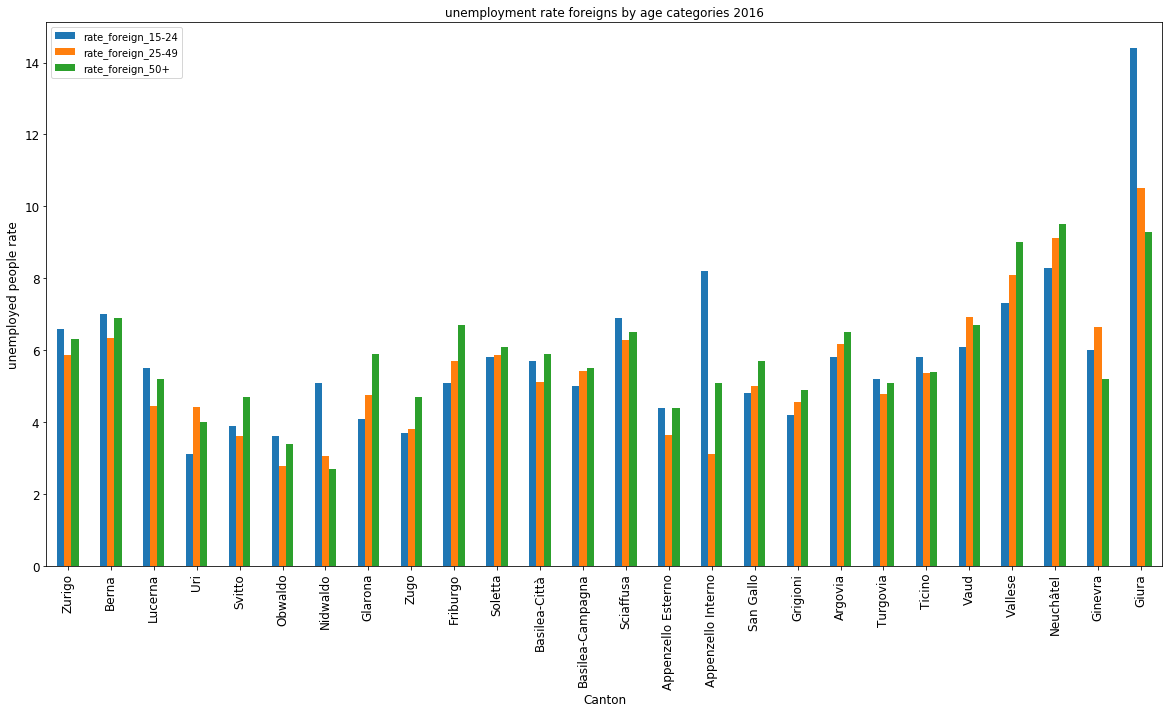

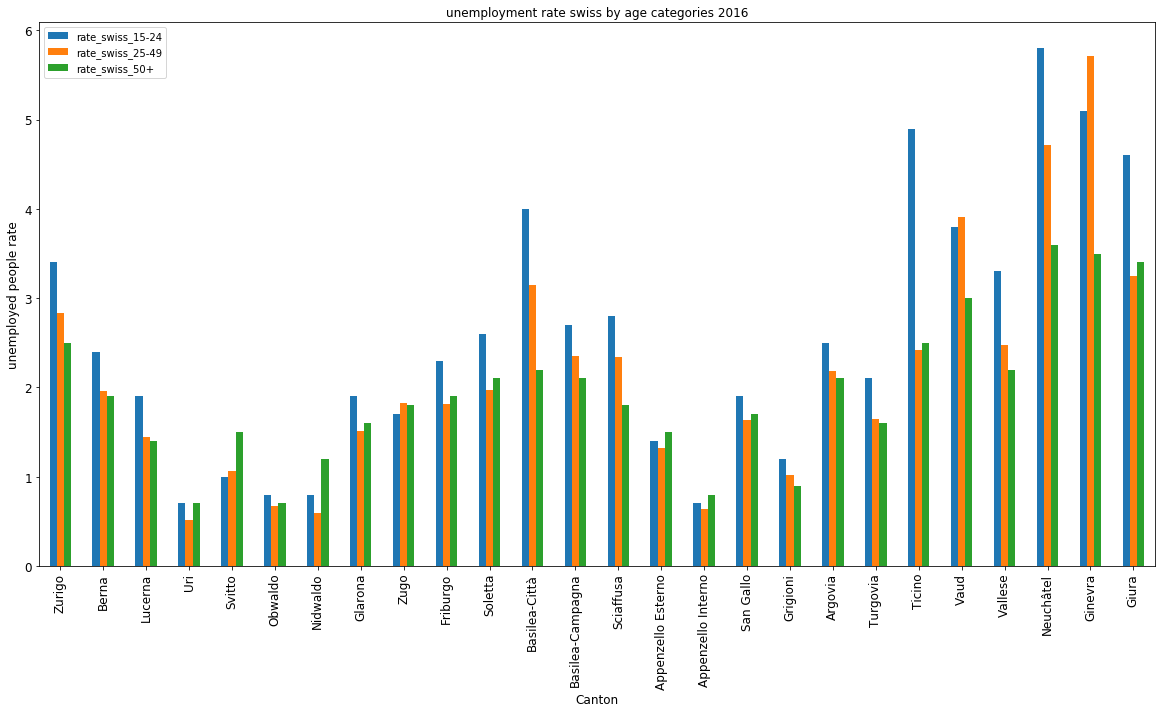

In [50]:
unemployed_foreigns_age_categories = df_for_swiss_categories[["rate_foreign_15-24", 'rate_foreign_25-49', 'rate_foreign_50+']]\
                                                .plot(kind='bar', title="unemployment rate foreigns by age categories 2016", 
                                                legend=True, fontsize=12, figsize=(20, 10))
    
unemployed_foreigns_age_categories.set_xlabel("Canton", fontsize=12)
unemployed_foreigns_age_categories.set_ylabel("unemployed people rate", fontsize=12)

#plot for the swiss categories
unemployed_swiss_age_categories = df_for_swiss_categories[["rate_swiss_15-24", 'rate_swiss_25-49', 'rate_swiss_50+']]\
                                                .plot(kind='bar', title="unemployment rate swiss by age categories 2016", 
                                                legend=True, fontsize=12, figsize=(20, 10))
    
unemployed_swiss_age_categories.set_xlabel("Canton", fontsize=12)
unemployed_swiss_age_categories.set_ylabel("unemployed people rate", fontsize=12)
plt.show()

- We can see in the swiss plot the percentage of unemployed people in the 15-24 years category is the highest in most of the cantons, also we can see that, as before we have higer rates of unemployment for the foreign people.

# Bonus 4

BONUS: using the map you have just built, and the geographical information contained in it, could you give a rough estimate of the difference in unemployment rates between the areas divided by the Röstigraben?

#### Answer:
In order to distinguish by the Röstigraben, we use on Amstat the filter 'Regione linguistica' for the linguistic region. Then we added this new column to our last dataframe, we grouped by the 'Regione linguistica' and sum the number of unemployed for each category and nationality and sum the number of active population for each category and nationality. After this, we could compute the new rates for each category and nationality for the two regions.

- loading the dataset

In [51]:
data_path_languages = 'data/languages.xlsx'
languages = pd.read_excel(data_path_languages, header=[2])
languages.head()

,Regione linguistica,Cantone,mese,Settembre 2017
0,NaN,NaN,Metriche,Disoccupati registrati
1,Svizzera tedesca,Zurigo,NaN,27225
2,Svizzera tedesca,Berna,NaN,13658
3,Svizzera tedesca,Lucerna,NaN,3885
4,Svizzera tedesca,Uri,NaN,112


- cleaning the dataset:

In [52]:
languages = languages.iloc[1:languages.shape[0]-2]
languages.dropna(axis=1, inplace=True)
languages.drop("Settembre 2017", axis=1, inplace=True)
languages = languages.set_index("Cantone")
languages.head()

,Regione linguistica
Cantone,
Zurigo,Svizzera tedesca
Berna,Svizzera tedesca
Lucerna,Svizzera tedesca
Uri,Svizzera tedesca
Svitto,Svizzera tedesca


- adding the language region to our last dataframe:

In [53]:
df_for_swiss_categories["language"] = languages["Regione linguistica"]

- now, we create a new dataframe with the groupby and the sum operations described before:

In [54]:
# group by language and applying the sum
languages_cluster = df_for_swiss_categories.groupby("language").sum()

# evaluate the new rate for foreigns in the 15-24 years category
languages_cluster["rate_foreign_15-24"] = languages_cluster["15-24_years_foreigns"]/languages_cluster["active_popul_foreign_15-24"] * 100

# evaluate the new rate for foreigns in the 25-49 years category
languages_cluster["rate_foreign_25-49"] = languages_cluster["25-49_foreigns"]/languages_cluster["active_popul_foreigns_25-49"] * 100

# evaluate the new rate for foreigns in the 50+ years category
languages_cluster["rate_foreign_50+"] = languages_cluster["50+_years_foreigns"]/languages_cluster["active_popul_foreign_50+"] * 100

# evaluate the new rate for swiss in the 15-24 years category
languages_cluster["rate_swiss_15-24"] = languages_cluster["15-24_years_swiss"]/languages_cluster["active_popul_swiss_15-24"] * 100

# evaluate the new rate for swiss in the 15-24 years category
languages_cluster["rate_swiss_25-49"] = languages_cluster["25-49_swiss"]/languages_cluster["active_popul_swiss_25-49"] * 100

# evaluate the new rate for swiss in the 15-24 years category
languages_cluster["rate_swiss_50+"] = languages_cluster["50+_years_swiss"]/languages_cluster["active_popul_swiss_50+"] * 100
languages_cluster.head()

,15-24_years_foreigns,rate_foreign_15-24,active_popul_foreign_15-24,25-49_foreigns,rate_foreign_25-49,active_popul_foreigns_25-49,50+_years_foreigns,rate_foreign_50+,active_popul_foreign_50+,15-24_years_swiss,rate_swiss_15-24,active_popul_swiss_15-24,25-49_swiss,rate_swiss_25-49,active_popul_swiss_25-49,50+_years_swiss,rate_swiss_50+,active_popul_swiss_50+
language,,,,,,,,,,,,,,,,,,
Svizzera romanda e Ticino,2222.916667,6.390642,34783.933593,19813.333333,6.872711,288289.941913,5586.083333,6.533916,85493.656092,4218.416667,3.975587,106108.011959,16538.333333,3.474190,4.760342e+05,7781.083333,2.795704,278322.832047
Svizzera tedesca,4119.083333,5.755329,71569.902642,29417.583333,5.506331,534250.191183,8447.166667,5.949170,141988.989126,8270.333333,2.420180,341723.944569,26825.083333,2.077972,1.290926e+06,16077.583333,1.937243,829920.625041


- for clarity we show only the new rates:

In [55]:
language_comparison = languages_cluster[["rate_foreign_15-24", "rate_foreign_25-49", "rate_foreign_50+",
                                         "rate_swiss_15-24", "rate_swiss_25-49", "rate_swiss_50+"]]
language_comparison.head()

,rate_foreign_15-24,rate_foreign_25-49,rate_foreign_50+,rate_swiss_15-24,rate_swiss_25-49,rate_swiss_50+
language,,,,,,
Svizzera romanda e Ticino,6.390642,6.872711,6.533916,3.975587,3.474190,2.795704
Svizzera tedesca,5.755329,5.506331,5.949170,2.420180,2.077972,1.937243


- It is interesting to note that in each age category for foreigns and swiss we have higer rates in the french part of the switzerland.



#### Thank you for your attention, we hope to have been clear as much as possible